In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [38]:
train = pd.read_csv('Tweets-Data.csv')

print(train.shape)

(3010, 4)


In [39]:
train.head()

,tweet_id,sentiment,author,tweet_data
0,1956967341,0,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,0,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,0,cool1ky,1eral ceremony...gloomy friday...
3,1956967789,1,czareaquino,wants to hang out with friends SOON!
4,1956968416,1,xkilljoyx,@dannycastillo We want to trade with someone w...


In [40]:
train.isnull().any()

tweet_id      False
sentiment     False
author        False
tweet_data     True
dtype: bool

In [41]:
train = train.dropna(how = 'any' , axis = 0)
train.isnull().any()

tweet_id      False
sentiment     False
author        False
tweet_data    False
dtype: bool

In [42]:
print(train[train['sentiment'] == 0].count())

tweet_id      936
sentiment     936
author        936
tweet_data    936
dtype: int64


In [43]:
# checking out the positive comments from the train set

train[train['sentiment'] == 0].head(10)

,tweet_id,sentiment,author,tweet_data
0,1956967341,0,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,0,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,0,cool1ky,1eral ceremony...gloomy friday...
6,1956968487,0,ShansBee,"I should be sleep, but im not! thinking about ..."
8,1956969035,0,nic0lepaula,@charviray Charlene my 1. I miss you
9,1956969172,0,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?
12,1956970047,0,Danied32,Ugh! I have to beat this stupid song to get to...
13,1956970424,0,Samm_xo,@BrodyJenner if u watch the hills in london u ...
15,1956971077,0,Sim_34,The storm is here and the electricity is gone
17,1956971206,0,brokenangel1982,So sleepy again and it's not even that late. I...


In [44]:
# checking out the negative comments from the train set 

train[train['sentiment'] == 1].head(10)

,tweet_id,sentiment,author,tweet_data
3,1956967789,1,czareaquino,wants to hang out with friends SOON!
4,1956968416,1,xkilljoyx,@dannycastillo We want to trade with someone w...
5,1956968477,1,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
7,1956968636,1,mcsleazy,Hmmm. http://www.djhero.com/ is down
10,1956969456,1,feinyheiny,cant fall asleep
11,1956969531,1,dudeitsmanda,Choked on her retainers
14,1956970860,1,okiepeanut93,Got the news
16,1956971170,1,poppygallico,@annarosekerr agreed
18,1956971473,1,LCJ82,@PerezHilton lady gaga tweeted about not being...
20,1956971981,1,andreagauster,@raaaaaaek oh too bad! I hope it gets better. ...


In [45]:
from operator import index

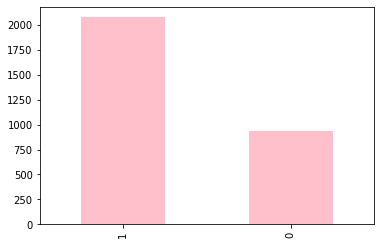

In [46]:
train['sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

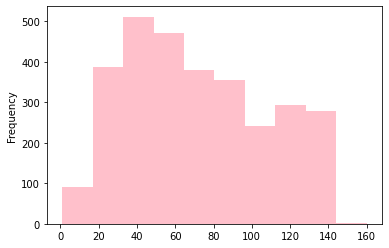

In [47]:
# checking the distribution of tweets in the data

length_train = train['tweet_data'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

In [48]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet_data'].str.len()

train.head(10)

,tweet_id,sentiment,author,tweet_data,len
0,1956967341,0,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92
1,1956967666,0,wannamama,Layin n bed with a headache ughhhh...waitin o...,60
2,1956967696,0,cool1ky,1eral ceremony...gloomy friday...,33
3,1956967789,1,czareaquino,wants to hang out with friends SOON!,36
4,1956968416,1,xkilljoyx,@dannycastillo We want to trade with someone w...,86
5,1956968477,1,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...,84
6,1956968487,0,ShansBee,"I should be sleep, but im not! thinking about ...",132
7,1956968636,1,mcsleazy,Hmmm. http://www.djhero.com/ is down,36
8,1956969035,0,nic0lepaula,@charviray Charlene my 1. I miss you,36
9,1956969172,0,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,42


In [49]:

train.groupby('sentiment').describe()

tweet_id                                                           \
             count          mean            std           min           25%   
sentiment                                                                     
0            936.0  1.957311e+09  208094.009907  1.956967e+09  1.957128e+09   
1           2073.0  1.957327e+09  207827.745416  1.956968e+09  1.957146e+09   

                                                        len             \
                    50%           75%           max   count       mean   
sentiment                                                                
0          1.957305e+09  1.957495e+09  1.957675e+09   936.0  71.803419   
1          1.957333e+09  1.957509e+09  1.957675e+09  2073.0  71.382537   

                                                     
                 std  min   25%   50%    75%    max  
sentiment                                            
0          36.783742  1.0  41.0  67.0  102.0  160.0  
1          36.253795  5.0  42.0  66.0  100.0  148.0

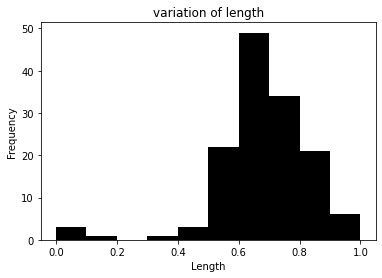

In [50]:
train.groupby('len').mean()['sentiment'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

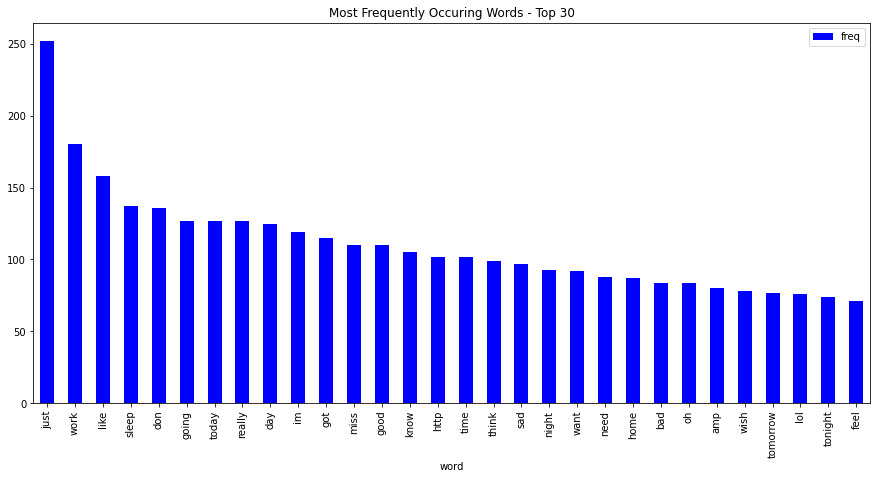

In [51]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet_data)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

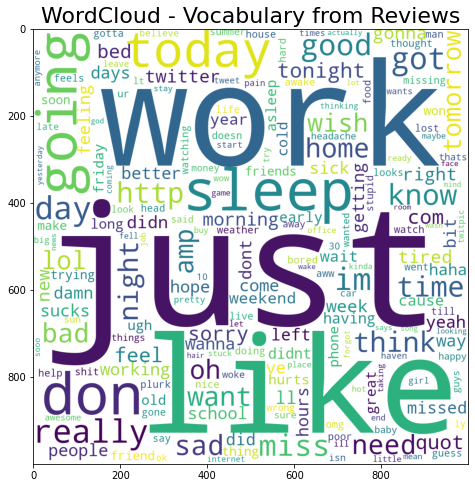

In [52]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

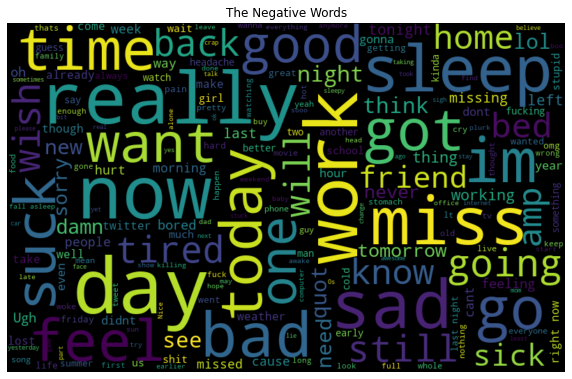

In [53]:
negative_words =' '.join([text for text in train['tweet_data'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


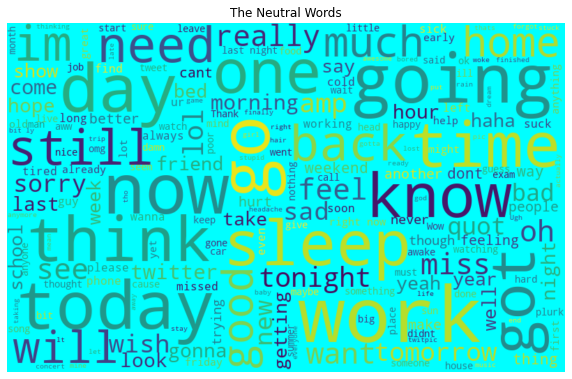

In [54]:
neutral_words =' '.join([text for text in train['tweet_data'][train['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


In [55]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [56]:
# extracting hashtags from non racist/sexist tweets
HT_negative  = hashtag_extract(train['tweet_data'][train['sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_regular = hashtag_extract(train['tweet_data'][train['sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

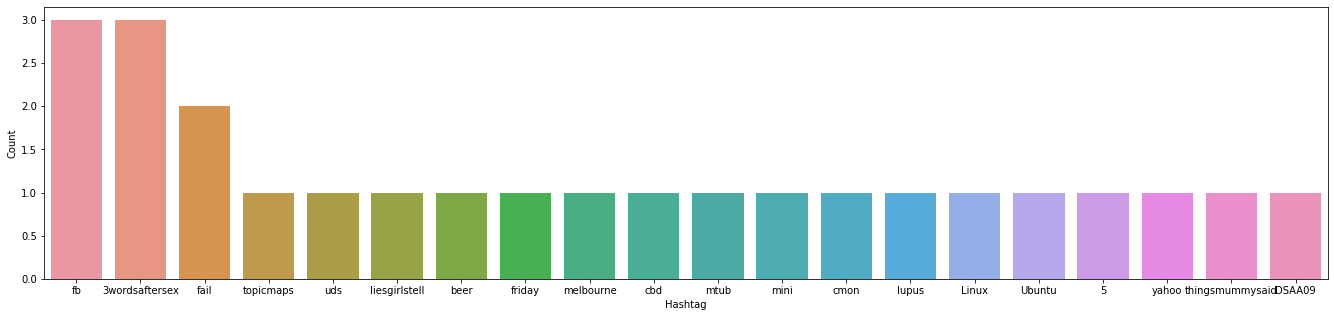

In [57]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(23,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

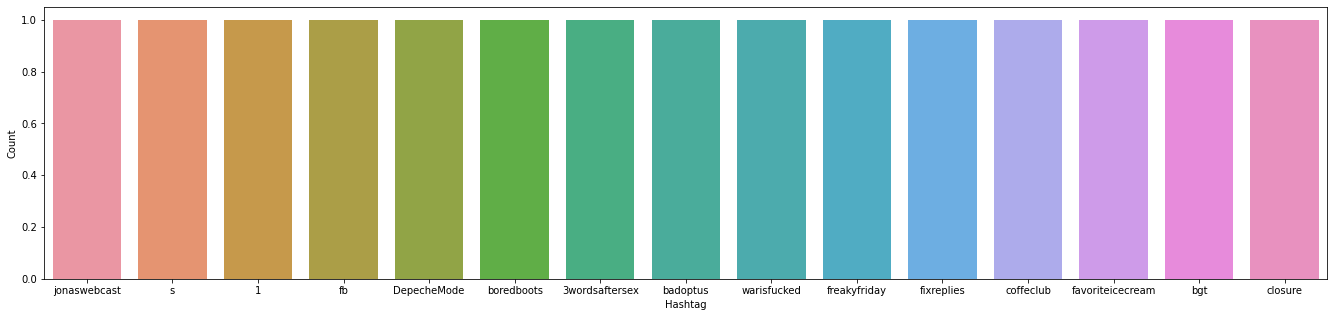

In [58]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(23,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [59]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet_data'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet_data']), epochs=20)

(490797, 800020)

In [60]:
model_w2v.wv.most_similar(positive = "dinner")

[('jack', 0.9541796445846558),
 ('fool', 0.9506567120552063),
 ('Bummed', 0.9501222372055054),
 ('vacation.', 0.9498967528343201),
 ('twitter!', 0.9494719505310059),
 ('though.', 0.9494656324386597),
 ('laid', 0.9491435885429382),
 ('ashamed', 0.9489829540252686),
 ('@RachelLock22', 0.948817789554596),
 ('worried', 0.9486669301986694)]

In [61]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [62]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@tiffanylue', 'i', 'know', 'i', 'was', 'listenin', 'to', 'bad', 'habit', 'earlier', 'and', 'i', 'started', 'freakin', 'at', 'his', 'part', '=['], tags=['tweet_0']),
 LabeledSentence(words=['Layin', 'n', 'bed', 'with', 'a', 'headache', 'ughhhh...waitin', 'on', 'your', 'call...'], tags=['tweet_1']),
 LabeledSentence(words=['1eral', 'ceremony...gloomy', 'friday...'], tags=['tweet_2']),
 LabeledSentence(words=['wants', 'to', 'hang', 'out', 'with', 'friends', 'SOON!'], tags=['tweet_3']),
 LabeledSentence(words=['@dannycastillo', 'We', 'want', 'to', 'trade', 'with', 'someone', 'who', 'has', 'Houston', 'tickets,', 'but', 'no', 'one', 'will.'], tags=['tweet_4']),
 LabeledSentence(words=['Re-pinging', '@ghostridah14:', 'why', "didn't", 'you', 'go', 'to', 'prom?', 'BC', 'my', 'bf', "didn't", 'like', 'my', 'friends'], tags=['tweet_5'])]

In [63]:
# removing unwanted patterns from the data

import re
import nltk
train = train[:2712]
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
train_corpus = []
for i in range(0, 2712):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet_data'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [65]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]


print(x.shape)
print(y.shape)


(2712, 2500)
(2712,)


In [66]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(2034, 2500)
(678, 2500)
(2034,)
(678,)


In [67]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9901671583087512
Validation Accuracy : 0.6371681415929203
F1 score : 0.7583497053045186
[[ 46 170]
 [ 76 386]]


In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.984267453294002
Validation Accuracy : 0.5707964601769911
f1 score : 0.6763070077864294
[[ 83 133]
 [158 304]]


In [70]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9901671583087512
Validation Accuracy : 0.6076696165191741
f1 score : 0.7121212121212122
[[ 83 133]
 [133 329]]


In [71]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.8623402163225172
Validation Accuracy : 0.6799410029498525
f1 score : 0.8088105726872247
[[  2 214]
 [  3 459]]


In [72]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.7173058013765978
Validation Accuracy : 0.6843657817109144
f1 score : 0.8092691622103387
[[ 10 206]
 [  8 454]]
